In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Clustering coefficient
To what extent are vertices adjacent to v also adjacent to each
other.

**<a href="#undirected">Simple connected undirected graph</a>**

**<a href="#directed">Simple connected directed graph</a>**

**<a href="#weighted">Simple weighted undirected graph</a>**

**<a href="#cc_graph">Clustering coefficient for a graph</a>**

**<a href="#vertex_strength">Vertex strength</a>**

<span id="undirected"></span>

#### Simple connected undirected graph

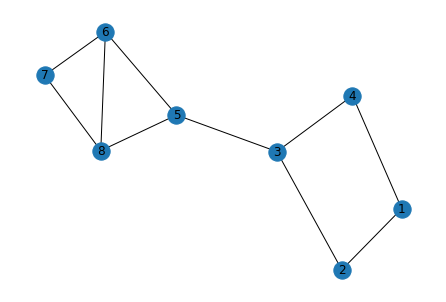

In [2]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([
    (1, 2), (1, 4),
    (2, 1), (2, 3),
    (3, 4), (3, 5), (3, 2),
    (4, 1), (4, 3),
    (5, 6), (5, 8),
    (6, 5), (6, 7), (6, 8),
    (7, 6), (7, 8),
    (8, 5), (8, 7),
])
nx.draw(G, with_labels=True)

In [3]:
def cc(graph, node=None):
    """Returns the clustering coefficient of a given vertex"""         
    nodes = {node: {} for node in graph.nodes}
    
    for _node in nodes.keys():
        neighbours = graph[_node]
        n = len(neighbours)
        
        if n <= 1:
            nodes[_node] = 0
            continue
        
        m = len(graph.subgraph(neighbours).edges)
        cc = (2 * m) / (n * (n - 1))
        nodes[_node] = cc
        
    if node:
        return nodes[node]
        
    return nodes

In [4]:
cc(G)

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.3333333333333333,
 6: 0.6666666666666666,
 7: 1.0,
 8: 0.6666666666666666}

In [5]:
# Double check with built-in method
nx.clustering(G)

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0.3333333333333333,
 6: 0.6666666666666666,
 7: 1.0,
 8: 0.6666666666666666}

<span id="directed"></span>

#### Simple connected directed graph

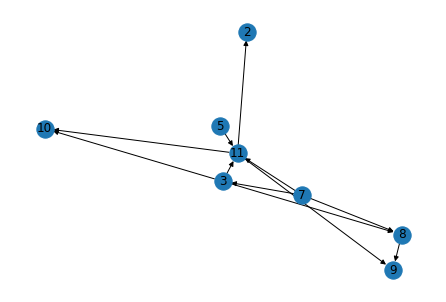

In [34]:
G = nx.DiGraph()

G.add_nodes_from([5, 7, 3, 11, 8, 2, 9, 10])
G.add_edges_from([(5, 11), (7, 11), (7, 8), (3, 8), (3, 10),
                  (11, 2), (11, 9), (11, 10), (8, 9), (7, 3), (3, 11)])

nx.draw(G, with_labels=True)

In [35]:
# not sure whats wrong
nx.clustering(G)

{5: 0,
 7: 0.3333333333333333,
 3: 0.25,
 11: 0.06666666666666667,
 8: 0.16666666666666666,
 2: 0,
 9: 0,
 10: 0.5}

In [13]:
def cc_directed(graph, node=None):
    """Returns the clustering coefficient of a given vertex"""         
    nodes = {node: {} for node in graph.nodes}
    
    for _node in nodes.keys():
        neighbours = graph[_node]
        n = len(neighbours)
        
        if n <= 1:
            nodes[_node] = 0
            continue
        
        m = len(graph.subgraph(neighbours).edges)
        cc = (m) / (n * (n - 1))
        nodes[_node] = cc
        
    if node:
        return nodes[node]
        
    return nodes

In [14]:
cc_directed(G)

{5: 0,
 7: 0.3333333333333333,
 3: 0.16666666666666666,
 11: 0.0,
 8: 0,
 2: 0,
 9: 0,
 10: 0}

<span id="weighted"></span>

#### Simple weighted undirected graph

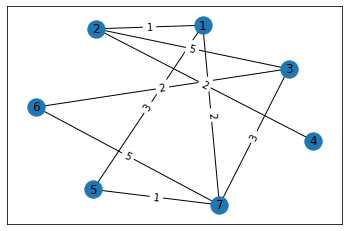

In [44]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([
    (1, 2, {'weight': 1}), (1, 5, {'weight': 3}), (1, 7, {'weight': 2}),
    (2, 4, {'weight': 2}), (2, 3, {'weight': 5}),
    (3, 7, {'weight': 3}), (3, 6, {'weight': 2}),
    (5, 7, {'weight': 1}),
    (6, 7, {'weight': 5}),
])

pos=nx.spring_layout(G, seed=5, k=10)
nx.draw_networkx(G,pos)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

In [45]:
nx.clustering(G)

{1: 0.3333333333333333,
 2: 0,
 3: 0.3333333333333333,
 4: 0,
 5: 1.0,
 6: 1.0,
 7: 0.3333333333333333}

<span id="cc_graph"></span>
#### Clustering coefficient for a graph

In [46]:
V_star = len([k for k, v in G.degree() if v > 1])
CC = sum([v for v in nx.clustering(G).values()]) / V_star
CC

0.5

<span id="vertex_strength"></span>

#### Vertex Strength

In [57]:
# Requires weighted graph

# adjacency matrix
A = nx.to_numpy_array(G)

nodes = {node: {} for node in G.nodes()}

n = len(nodes)

for i in range(n):
    # care about the +1, it's not always necessary
    nodes[i+1] = A[i].sum()

In [58]:
nodes

{1: 6.0, 2: 8.0, 3: 10.0, 4: 2.0, 5: 4.0, 6: 7.0, 7: 11.0}

In [60]:
A

array([[0., 1., 0., 0., 3., 0., 2.],
       [1., 0., 5., 2., 0., 0., 0.],
       [0., 5., 0., 0., 0., 2., 3.],
       [0., 2., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 1.],
       [0., 0., 2., 0., 0., 0., 5.],
       [2., 0., 3., 0., 1., 5., 0.]])